# In this project we are going to predict the sale price of bulldozers
## 1.Problem Defination
> How well we can Predict the future price of a bulldozer given its characteristic and its example of how muchh similar bulldozers have been sold
## 2.Data
Data has been downloaded from Kaggle , competetion link included:https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview

There are three main datasets:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3.Evalution
* The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

## 4.Feature
* Kaggle provided a dictionary detailing all of the feature of dataset

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bluebook-for-bulldozers/Valid.7z
/kaggle/input/bluebook-for-bulldozers/Valid.zip
/kaggle/input/bluebook-for-bulldozers/Train.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv
/kaggle/input/bluebook-for-bulldozers/median_benchmark.csv
/kaggle/input/bluebook-for-bulldozers/Valid.csv
/kaggle/input/bluebook-for-bulldozers/Machine_Appendix.csv
/kaggle/input/bluebook-for-bulldozers/random_forest_benchmark_test.csv
/kaggle/input/bluebook-for-bulldozers/Data Dictionary.xlsx
/kaggle/input/bluebook-for-bulldozers/ValidSolution.csv
/kaggle/input/bluebook-for-bulldozers/Test.csv
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.7z
/kaggle/input/bluebook-for-bulldozers/Train.7z


In [2]:
import pandas as pd
df=pd.read_csv('/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv',
               low_memory=False) #low memory is to optimize space
df.shape

(412698, 53)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
# Our most important feature is saledate since it is a time series prediction
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

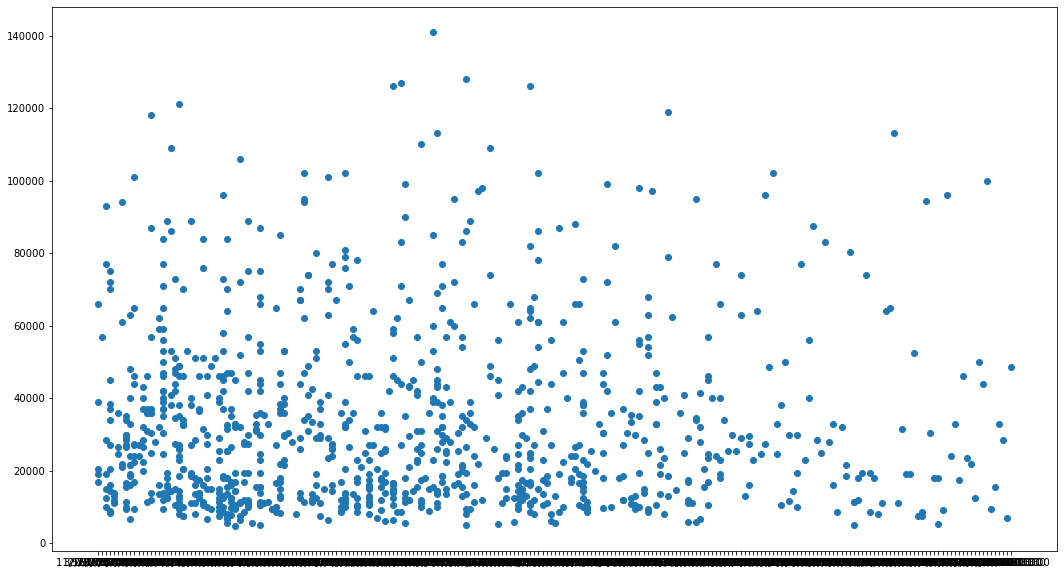

In [6]:
fig,ax=plt.subplots(figsize=(18,10))
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

<AxesSubplot:ylabel='Frequency'>

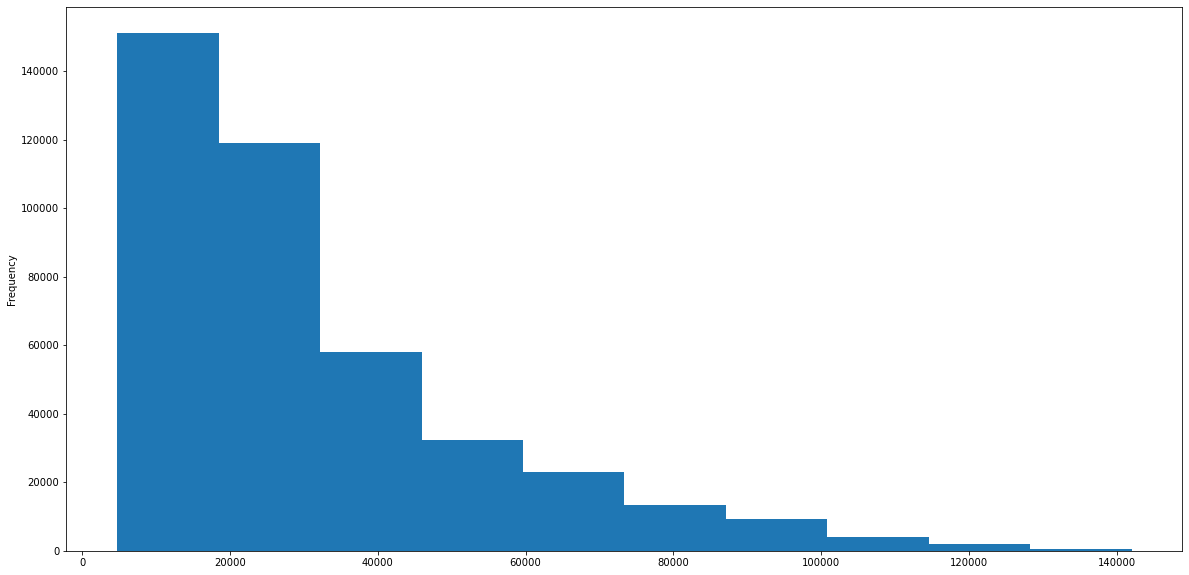

In [7]:
df.SalePrice.plot.hist(figsize=(20,10))

In [8]:
# df.drop("SalePrice", axis=1).apply(lambda x: x.corr(df.SalePrice))

## Parsing Dates
1. When we work with time series data,we want to enrich the data and date components as much possible
2. We can do that by telling pandas which of our columns has dates in it using the "parse_date" parameter 

In [9]:
#Now we will import the data again but change the datatype with the help of parse_data
df=pd.read_csv('/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv',
               low_memory=False,
               parse_dates=['saledate'])
df.saledate.dtype

dtype('<M8[ns]')

In [10]:
# Now to verify
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

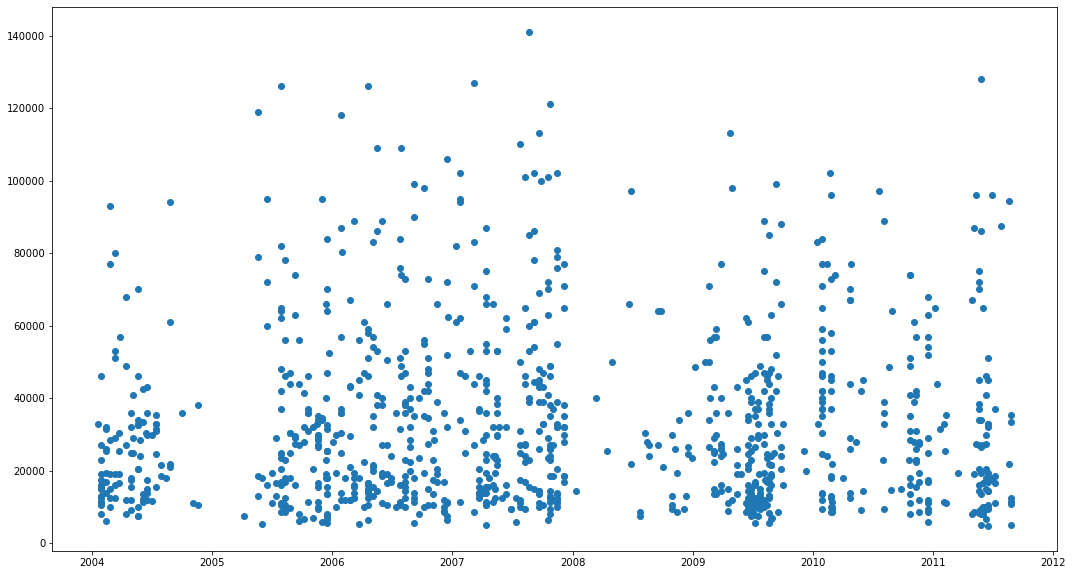

In [11]:
# Again plotting a scatter graph
fig,ax=plt.subplots(figsize=(18,10))
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

In [12]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# In order to see each and every column with their values we will do the following
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [14]:
# Unsorted dates
df.saledate.head(10)

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

# Sort dataframe based on saledate
1. When dealing with timeseries data its good practice to sort Dataframe by date

In [15]:
# Sorting dataframe
df.sort_values(by=['saledate'],inplace=True,ascending=True)
df.saledate.head()
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


# Make a copy of original data
We will make a copy of the original data so that we still got the original data when we manipulate the copy

In [16]:
# Making copy
df_temp=df.copy()
df_temp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature Engineering

## Add a datetime parameter for 'saledate' column 

In [17]:
# Adding new columns with the help of saledate
df_temp["saleYear"]=df_temp.saledate.dt.year
df_temp["saleMonth"]=df_temp.saledate.dt.month
df_temp["saleDay"]=df_temp.saledate.dt.day
df_temp["saleDayofWeek"]=df_temp.saledate.dt.dayofweek
df_temp["saleDayofYear"]=df_temp.saledate.dt.dayofyear

In [18]:
# Now as we enrich our data with new columns we can remove saledate column
df_temp.drop('saledate',axis=1,inplace=True)

In [19]:
len(df_temp)

412698

## 5. Modeling
We have done EDA but lets start do to some model driven EDA (model tell us to correct the data)

In [20]:
# Lets build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_jobs=-1,random_state=42) #setting jobs to -1 will allow computer to use as many as cores as possible
# model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"]) --> This will give an error because all values are not in int format

In [21]:
# As we can see
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [22]:
# Following is in string object
df_temp.UsageBand.dtype

dtype('O')

In [23]:
# We also have null values which we have to set
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Converting strings to catagories
One way we can turn all of our data into numbers is by converting them into pandas catagories

In [24]:
# Checking whether a column is string or not
pd.api.types.is_string_dtype(df_temp.UsageBand)

True

In [25]:
# Finding column which contain string 
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
    

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [26]:
# This will turn all string into catagories 
# We cant pass strings to our machine learning models
# By converting string to catagories they will appear same as string but pandas had assigned values to each catagory(string) 
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label]=content.astype("category").cat.as_ordered()

In [27]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [28]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [29]:
# Verifying values to categories
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [30]:
# Checking missining values ration in each column 
(df_temp.isna().sum()/len(df_temp))*100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

## Saving the preprocessed data

In [31]:
# Exporing 
df_temp.to_csv("/kaggle/working/train_temp2.csv")


In [32]:
# Importing 
df_temp=(pd.read_csv("/kaggle/working/train_temp2.csv",low_memory=False)).drop('Unnamed: 0',axis=1)
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Filling missing value
### 1.Filling numeric missing values 

In [33]:
# Finding column which contain string 
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [34]:
# Check which numeric values has null values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [35]:
# Fill numeric rows with median
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Add a binary column which show that if the data was missing or not 
            df_temp[label+"_is_missing"]=pd.isnull(content)
            #Fill the missing values with median 
            df_temp[label]=content.fillna(content.median())

In [36]:
# Verifying
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### 2.Filling catagorical missing value 

In [37]:
# Check which catagorical columns has null values
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [38]:
# Since we know that catagories are assigned numeric values so we will turn them to numbers and 
# fill missing values as well
# Check which numeric values has null values
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add a binary column which show that if the data was missing or not 
        df_temp[label+"_is_missing"]=pd.isnull(content)
        #Turn catagories to numbers and add +1 
        # (why we do +1 because in pandas if we have missing values it assigned them a value of -1)
        df_temp[label]=pd.Categorical(content).codes + 1
        #Fill the missing values with median
        

In [39]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [40]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [41]:
# Checking wheteher null values till present
df_temp.isna().sum()[:10]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
dtype: int64

In [42]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


#### Now as we have completely evaluated and corrected our data we should be able to build a machine leaning model

In [43]:
# First we will do by not spitting the data
# Instantiate model 
model=RandomForestRegressor(n_jobs=-1,random_state=42)
# Fit a model
model.fit(df_temp.drop('SalePrice',axis=1),df_temp["SalePrice"])

RandomForestRegressor(n_jobs=-1, random_state=42)

In [44]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [45]:
# Score the model 
model.score(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"]) 
#Score will be high because we have trained the model on full data as well as test on the trained data

0.9875468079970562

## Spliting data into train/validation sets

#### From data describtion in kaggle we can see that training data is till 2011 and validation data is from jan1,2012 to april 30,2012 so we will split data in that way , because we are working on dataset containing both these datasets

In [46]:
#Splitting data into train and valid data 
df_val=df_temp[df_temp.saleYear==2012]
df_train=df_temp[df_temp.saleYear!=2012]
# df_temp

In [47]:
# Spliting data into X and y
X_train,y_train=df_train.drop('SalePrice',axis=1),df_train['SalePrice']
X_val,y_val=df_val.drop('SalePrice',axis=1),df_val['SalePrice']

In [48]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(10,10))
# cor=X_train.corr()
# sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
# plt.show()

## Building and evalution function

In [49]:
# Create evalution function (the competetion uses RMSLE)
from sklearn.metrics import mean_absolute_error,mean_squared_log_error,r2_score
 
def rmsle(y_test,y_pred):
    """
    Calculate RMSLE between prediction and true labels
    """
    #sprt (square root)
    return np.sqrt(mean_squared_log_error(y_test,y_pred))
    
# Create function to evalute the model on few different levels
def show_scores(model):
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_val)
    scores={
            "Training MAE":mean_absolute_error(y_train,train_preds),
            "Valid MAE":mean_absolute_error(y_val,val_preds),
            "Training RMSLE":rmsle(y_train,train_preds),
            "Valid RMSLE":rmsle(y_val,val_preds),
            "Training R^2":r2_score(y_train,train_preds),
            "Valid R^2":r2_score(y_val,val_preds)
           }
    return scores

## Testing our model on subset (to tune hyperparameters)

In [50]:
# We can reduce training set in RandomForestRegressor with the help of max_sample
model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)
model.fit(X_train,y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [51]:
import numpy as np
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameters tunning with the help of RandomizeSearchCV

In [52]:
from sklearn.model_selection import RandomizedSearchCV

# Different randomforestregressor hyperparameters
rf_grid={
    "n_estimators":np.arange(10,100,10),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2),
    "max_features":[0.5,1,'sqrt','auto'],
    "max_samples":[10000]
}

# Instanciate RSCV
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                            param_distributions=rf_grid,
                            n_iter=20, #Will perform 20 different combination of hyperparameters
                            cv=5,
                            verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [53]:
# Finding the best params
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [54]:
# Evalute the randomizedsearch model
show_scores(rs_model)
# Comparing it with the above scores we can our model has improved

{'Training MAE': 6243.437094367317,
 'Valid MAE': 7590.111221874846,
 'Training RMSLE': 0.2821751949574913,
 'Valid RMSLE': 0.306800010028582,
 'Training R^2': 0.8262485647987317,
 'Valid R^2': 0.8117618782486634}

In [55]:
X_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6260687,1074871,4331,149,2.0,1000,0.0,0,3137,1055,...,True,True,True,True,True,True,True,True,False,False
401121,6312170,1812622,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
401122,6312727,1811599,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
401123,6315051,1858173,17432,149,2.0,2004,0.0,0,3389,1175,...,True,True,True,True,True,True,True,True,True,True


## Training a model with the best hyperparameters (above mentioned)

In [56]:
# Most ideal parameters
ideal_model=RandomForestRegressor(
                                 n_estimators= 30,
                                 min_samples_split= 18,
                                 min_samples_leaf= 1,
                                 max_samples= 10000,
                                 max_features= 'auto',
                                 max_depth= None,
                                 random_state=42
                                 )
# Trained on whole data
ideal_model.fit(X_train,y_train)

RandomForestRegressor(max_samples=10000, min_samples_split=18, n_estimators=30,
                      random_state=42)

In [57]:
show_scores(ideal_model)

{'Training MAE': 5918.365567915266,
 'Valid MAE': 7442.295738707047,
 'Training RMSLE': 0.2697670793457814,
 'Valid RMSLE': 0.30183536245226644,
 'Training R^2': 0.8418878929937055,
 'Valid R^2': 0.8166898032894172}

## Make prediction on Test data

In [3]:
# Importing test dataset
test=pd.read_csv("/kaggle/input/bluebook-for-bulldozers/Test.csv",parse_dates=['saledate'])
test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


In [59]:
# Make prediction on test dataset
# test_pred=ideal_model.predict(test) --> Will give an error because no data processing has been done

### Preprocessing the data (getting the test dataset in the same format as train and valid dataset)

In [4]:
def preprocessdata(dataset):
    
    # Adding new columns with the help of saledate
    test["saleYear"]=test.saledate.dt.year
    test["saleMonth"]=test.saledate.dt.month
    test["saleDay"]=test.saledate.dt.day
    test["saleDayofWeek"]=test.saledate.dt.dayofweek
    test["saleDayofYear"]=test.saledate.dt.dayofyear
    
    test.drop('saledate',axis=1,inplace=True)
    
    # Fill numeric rows with median
    for label,content in test.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #Add a binary column which show that if the data was missing or not 
                test[label+"_is_missing"]=pd.isnull(content)
                #Fill the missing values with median 
                test[label]=content.fillna(content.median())
    
    # Since we know that catagories are assigned numeric values so we will turn them to numbers and 
    # fill missing values as well
    # Check which numeric values has null values
    for label,content in test.items():
        if not pd.api.types.is_numeric_dtype(content):
            #Add a binary column which show that if the data was missing or not 
            test[label+"_is_missing"]=pd.isnull(content)
            #Turn catagories to numbers and add +1 
            # (why we do +1 because in pandas if we have missing values it assigned them a value of -1)
            test[label]=pd.Categorical(content).codes + 1
            #Fill the missing values with median
 
    return dataset

In [9]:
# Processing test data
# test=preprocessdata(test)
test.to_csv("/kaggle/working/test.csv",index=False)

In [62]:
# Make prediction on test dataset

# test_pred=ideal_model.predict(test) --> Will give an error


In [63]:
# We can find how the columns are missing by using python sets
set(X_train.columns)-set(test.columns)

{'auctioneerID_is_missing'}

In [64]:
# Manually adjust "test" to have "auctioneerID_is_missing" column
test["auctioneerID_is_missing"]=False

In [65]:
set(X_train.columns)-set(test.columns)

set()

In [66]:
# Make prediction on test dataset
test_pred=ideal_model.predict(test) 
np.asarray(test[:1])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([[1227829, 1006309, 3168, 121, 3, 1999, 3688.0, 2, 499, 180, 25, 0,
        0, 0, 2, 51, 1, 1, 4, 3, 2, 2, 1, 2, 7, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2012, 5, 3,
        3, 124, False, False, False, False, False, True, True, True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, False]], dtype=object)

In [67]:
# Format prediction into the same format Kaggle is after
df_preds=pd.DataFrame()
df_preds['SalesID']=test['SalesID']
df_preds['SalesPrice']=test_pred
df_preds 

,SalesID,SalesPrice
0,1227829,19353.477757
1,1227844,24296.483345
2,1227847,52891.907964
3,1227848,82116.495255
4,1227863,35120.014208
...,...,...
12452,6643171,47653.337413
12453,6643173,13350.838804
12454,6643184,12927.333100
12455,6643186,15698.116656


In [68]:
# Exporting predictions
df_preds.to_csv("/kaggle/working/final_price_predicted.csv",index=False)

In [69]:
import pickle
with open("model_file.bin", "wb") as file:
    pickle.dump(ideal_model, file)

In [70]:
with open("model_file.bin", "rb") as file:
    model = pickle.load(file)
# model.predict(hero)

In [71]:
test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Stick_Length_is_missing', 'Thumb_is_missing',
       'Pattern_Changer_is_missing', 'Grouser_Type_is_missing',
       'Backhoe_Mounting_is_missing', 'Blade_Type_is_missing',
       'Travel_Controls_is_missing', 'Differential_Type_is_missing',
       'Steering_Controls_is_missing', 'auctioneerID_is_missing'],
      dtype='object', length=102)